In [87]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [88]:
# freq = np.array([3.904,3.504,3.000,2.500,2.000,1.500,1.000,0.5,0.7,0.2])
# I = np.array([1.84,1.06,1.40,1.15,0.9,0.66,0.41,0.16,0.14,0.0])
# plt.plot(I,freq,'o')

In [89]:
def fit_and_plot(x,y,xlabel="",ylabel="",title="",zeroed=False,annotate_fit= True,right_words = False,error_bar="",sci_lim = False,annotate="",right_annotate=False,marker='o'):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(x,y,'{}'.format(marker))
    z = np.polyfit(x,y, 1) 
    p = np.poly1d(z)
    if zeroed : 
        a = np.linspace(0,max(x))
    else:
        a = np.linspace(min(x),max(x))
    ax1.plot(a, p(np.linspace(min(x),max(x))),color="red")
    if annotate_fit: 
        slope = z[0]
        intercept = z[1]
        if right_words:    
            ax1.text(0.48,0.85,"y= %.5f x + %.5f"%(slope,intercept), fontsize=13,transform=ax1.transAxes)
        else:
            ax1.text(0.03,0.85,"y= %.5f x + %.5f"%(slope,intercept), fontsize=13,transform=ax1.transAxes)
    if title !="":
        plt.title(title,fontsize=13 )    
    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(ylabel,fontsize=12)
    if annotate!="":
        if right_annotate: 
            ax1.text(0.48,0.85,annotate, fontsize=13,transform=ax1.transAxes)
    if error_bar!="":
        ax1.errorbar(x, y, yerr=error_bar, fmt='o')
    if sci_lim:
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.tick_params(axis='both', which='minor', labelsize=12)
    return p

poly1d([ 2.07575879,  0.27831421])

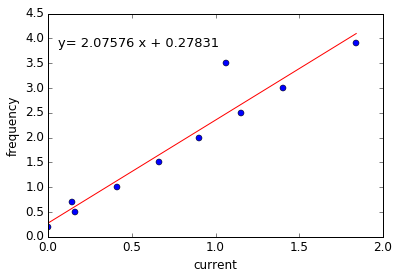

In [8]:
fit_and_plot(I,freq,"current","frequency")

poly1d([ 2.02474429,  0.17759006])

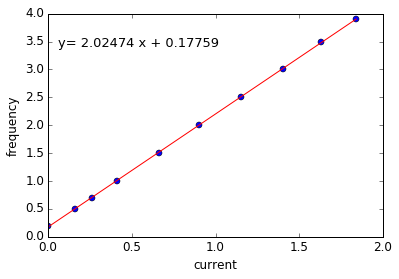

In [90]:
freq_pos = np.array([3.904,3.500,3.000,2.500,2.000,1.500,1.000,0.7,0.5,0.2])
I_pos = np.array([1.84,1.63,1.40,1.15,0.9,0.66,0.41,0.26,0.16,0.0])
# plt.plot(I,freq,'o')
fit_and_plot(I_pos,freq_pos,"current","frequency")

poly1d([-1.99645746, -0.06592517])

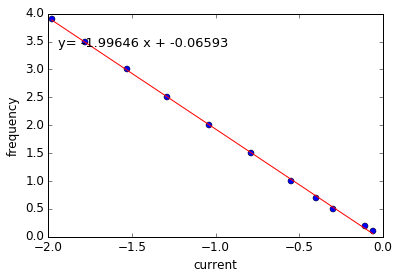

In [91]:
freq_neg = np.array([3.900,3.500,3.000,2.500,2.000,1.500,1.000,0.7,0.5,0.2,0.1])
I_neg = -np.array([1.98,1.78,1.53,1.29,1.04,0.79,0.55,0.40,0.30,0.11,0.06])
fit_and_plot(I_neg,freq_neg,"current","frequency")

In [92]:
I_mega = list(I_neg)+list(I_pos)
freq_mega = list(freq_neg)+list(freq_pos)

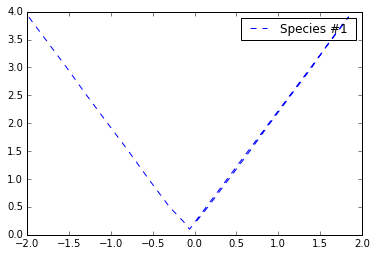

In [93]:
plt.plot(I_mega,freq_mega,'--',color = "blue",label = "Species #1 ")
plt.legend()

poly1d([-2.94068693, -0.08437887])

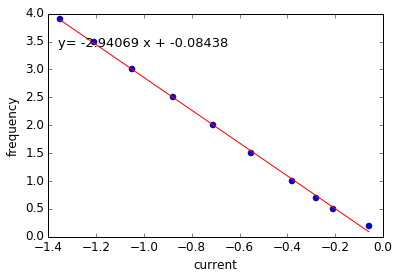

In [94]:
freq2_neg = np.array([3.900,3.500,3.000,2.500,2.000,1.500,1.000,0.7,0.5,0.2])
I2_neg = -np.array([1.35,1.21,1.05,0.88,0.71,0.55,0.38,0.28,0.21,0.06])
fit_and_plot(I2_neg,freq2_neg,"current","frequency")

poly1d([ 3.05432943,  0.24938808])

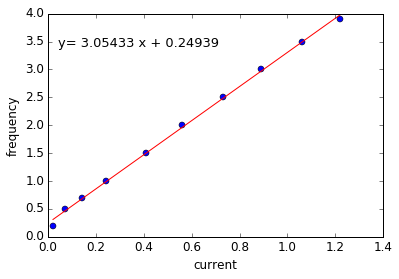

In [95]:
freq2_pos = np.array([3.904,3.500,3.000,2.500,2.000,1.500,1.000,0.7,0.5,0.2])
I2_pos = np.array([1.22,1.06,0.89,0.73,0.56,0.41,0.24,0.14,0.07,0.02])
# plt.plot(I,freq,'o')
fit_and_plot(I2_pos,freq2_pos,"current","frequency")

In [96]:
I2_mega = list(I2_neg)+list(I2_pos)
freq2_mega = list(freq2_neg)+list(freq2_pos)

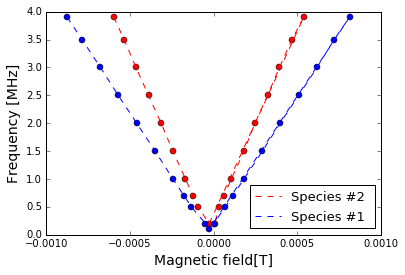

In [107]:
from matplotlib.legend_handler import HandlerLine2D
N = 135 #turns
a = 0.275 #meters
B_mega = 0.9e-6 * N*np.array(I_mega)/a
B2_mega = 0.9e-6 * N*np.array(I2_mega)/a

plt.plot(B2_mega,freq2_mega,'o',color = "red")
plt.plot(B2_mega,freq2_mega,'--',color = "red",label = "Species #2 ")
plt.plot(B_mega,freq_mega,'o',color = "blue")
plt.plot(B_mega,freq_mega,'--',color = "blue",label = "Species #1 ")
plt.legend(loc='lower right',prop={'size':13},numpoints=1)
plt.title("",fontsize=14)
plt.xlabel("Magnetic field[T]" ,fontsize=14)
plt.ylabel("Frequency [MHz]",fontsize=14)

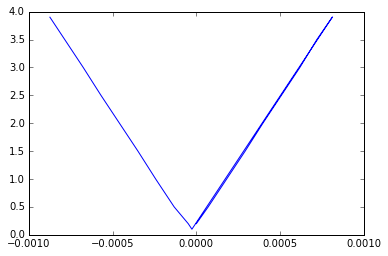

In [51]:
N = 135 #turns
a = 0.275 #meters
B1 = 0.9e-6 * N*np.array(I_mega)/a
plt.plot(B1,freq_mega)

In [55]:
min(B1)

-0.00087480000000000001

In [57]:
print  0.9e-6 * N*0.178/a ,"teslas"

7.86436363636e-05 teslas


Earth's magnetic field $\approx$ 78 $\mu$ Teslas

To get more data point from the fit join together the datasets 

In [75]:
np.ones_like(I_mega)*0.01

array([ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
        0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
        0.01,  0.01,  0.01])

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


poly1d([ 2.05193032,  0.13417815])

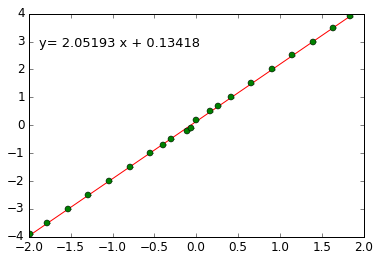

In [83]:
I_mega = list(I_neg)+list(I_pos)
freq_mega = list(-freq_neg)+list(freq_pos)
fit_and_plot(I_mega,freq_mega,marker = ',',error_bar = np.ones_like(I_mega)*0.01)

In [80]:
print  0.9e-6 * N*0.13417815/a ,"teslas"

5.92823462727e-05 teslas


In [81]:
 0.9e-6 * N*0.02/a

8.836363636363635e-06

In [82]:
0.9e-6 * N*0.13418/a -  0.9e-6 * N*0.02/a

5.04468e-05